<a href="https://colab.research.google.com/github/Ale2779/telecomx-churn-analysis/blob/main/Challenge_Telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bibliotecas**

In [161]:
import requests
import pandas as pd


#**📌 Extracción**

In [162]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
response.raise_for_status()  # buena práctica

data = response.json()
datos = pd.DataFrame(data)

datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#**🔧 Transformación**


In [163]:
datos.info()
datos.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [164]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

datos_limpios = pd.concat(
    [
        datos[['customerID', 'Churn']],
        customer_df,
        phone_df,
        internet_df,
        account_df
    ],
    axis=1
)


In [165]:
datos_limpios.head()
datos_limpios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [166]:
datos_limpios.isnull().sum().sort_values(ascending=False)


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [167]:
datos_limpios.duplicated().sum()


np.int64(0)

In [168]:
datos_limpios['customerID'].duplicated().sum()


np.int64(0)

In [169]:
datos_limpios.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [170]:
datos_limpios['Contract'].value_counts()


,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [171]:
datos_limpios['InternetService'].value_counts()


,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [172]:
datos_limpios['PaymentMethod'].value_counts()


,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [173]:
datos_limpios['Charges.Total'] = pd.to_numeric(
    datos_limpios['Charges.Total'],
    errors='coerce'
)


In [174]:
datos_limpios.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [175]:
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].fillna(0)


In [176]:
cols_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_internet:
    datos_limpios[col] = datos_limpios[col].replace(
        'No internet service', 'No'
    )


In [177]:
datos_limpios['MultipleLines'] = datos_limpios['MultipleLines'].replace(
    'No phone service', 'No'
)


In [178]:
datos_limpios = datos_limpios.drop_duplicates()


In [179]:
datos_limpios['Churn'] = datos_limpios['Churn'].map({'Yes': 1, 'No': 0})


In [180]:
datos_limpios.info()
datos_limpios.isnull().sum()
datos_limpios.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [181]:
datos_limpios['Cuentas_Diarias'] = datos_limpios['Charges.Monthly'] / 30


In [182]:
datos_limpios[['Charges.Monthly', 'Cuentas_Diarias']].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [183]:
datos_limpios['Cuentas_Diarias'].describe()


,Cuentas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


In [184]:
cols_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]


In [185]:
for col in cols_binarias:
    datos_limpios[col] = datos_limpios[col].map({'Yes': 1, 'No': 0})


In [186]:
datos_limpios['Contract'].value_counts()
datos_limpios['PaymentMethod'].value_counts()


,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [187]:
datos_limpios = datos_limpios.rename(columns={
    'tenure': 'Antiguedad_Meses',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total',
    'Contract': 'Tipo_Contrato',
    'PaymentMethod': 'Metodo_Pago'
})


In [188]:
datos_limpios.head()
datos_limpios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Antiguedad_Meses  7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Tipo_Contrato     7267 non-null   object 


#**📊 Carga y análisis**

In [189]:
datos_limpios.describe()


,Churn,SeniorCitizen,Partner,Dependents,Antiguedad_Meses,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [190]:
datos_limpios[
    ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']
].describe()


,Antiguedad_Meses,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


##Comparar clientes que se van vs los que se quedan

###1. Métricas clave por Churn

In [191]:
datos_limpios.groupby('Churn')[
    ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']
].mean()


,Antiguedad_Meses,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
Churn,,,,
0.0,37.569965,61.265124,2549.911442,2.042171
1.0,17.979133,74.441332,1531.796094,2.481378


###2. Distribución de churn (proporción)

In [192]:
datos_limpios['Churn'].value_counts(normalize=True)
#Aproximadamente 26.5% de los clientes abandonaron el servicio


,proportion
Churn,
0.0,0.73463
1.0,0.26537


###3.Análisis por tipo de contrato (muy relevante)

In [193]:
datos_limpios.groupby('Tipo_Contrato')['Churn'].mean()


,Churn
Tipo_Contrato,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


###4. Servicios y churn (variables binarias)

In [194]:
servicios = [
    'OnlineSecurity', 'TechSupport', 'OnlineBackup',
    'DeviceProtection', 'StreamingTV', 'StreamingMovies'
]

datos_limpios.groupby('Churn')[servicios].mean()


,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies
Churn,,,,,,
0.0,0.333204,0.335137,0.368380,0.362775,0.365868,0.369927
1.0,0.157838,0.165864,0.279829,0.291600,0.435527,0.437667


###Distribucion Evasion de Clientes

In [195]:
churn_counts = datos_limpios['Churn'].value_counts()
churn_counts

#Si Churn = 1 → cliente que se fue
#Si Churn = 0 → cliente que permaneció


,count
Churn,
0.0,5174
1.0,1869


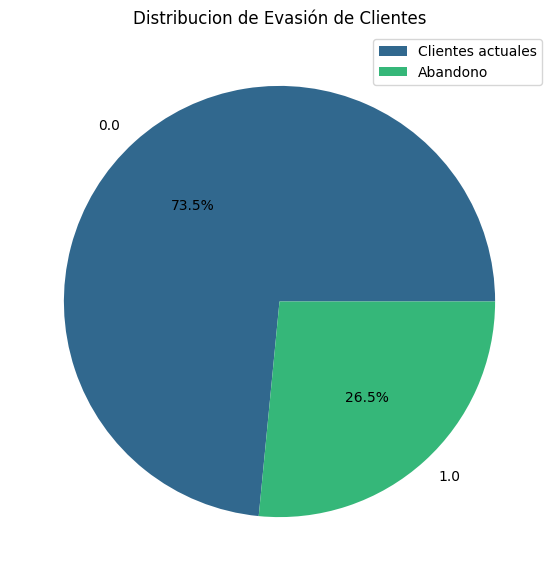

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('viridis',2)
plt.figure()
churn_counts.plot(kind='pie', autopct='%1.1f%%',colors=colors, figsize= (7,7))
plt.ylabel('')
plt.title('Distribucion de Evasión de Clientes')
plt.legend (labels= ['Clientes actuales','Abandono'])
plt.show()



####Evasion por genero

In [197]:
churn_genero = (
    datos_limpios
    .groupby(['gender', 'Churn'])
    .size()
    .unstack(fill_value=0)
)
churn_genero


Churn,0.0,1.0
gender,,
Female,2549,939
Male,2625,930


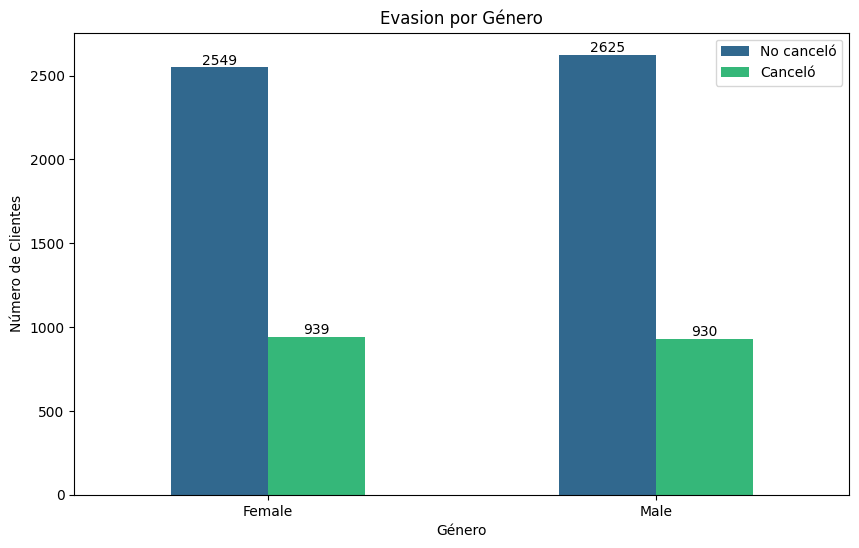

In [198]:
colors = sns.color_palette('viridis',2)
ax=churn_genero.plot(kind='bar',figsize=(10,6), color=colors)
plt.title('Evasion por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(['No canceló', 'Canceló'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge')


plt.show()





####Evasion por contrato

In [199]:

churn_contrato = (
    datos_limpios
    .groupby(['Tipo_Contrato', 'Churn'])
    .size()
    .unstack()
)

churn_contrato


Churn,0.0,1.0
Tipo_Contrato,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


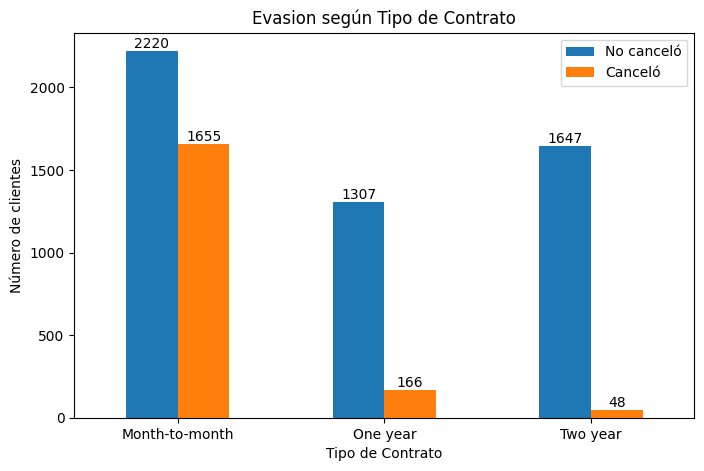

In [200]:
ax = churn_contrato.plot(kind='bar', figsize=(8,5))

plt.title('Evasion según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(['No canceló', 'Canceló'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()



####Evasion por Método de pago

In [201]:
churn_pago = (
    datos_limpios
    .groupby(['Metodo_Pago', 'Churn'])
    .size()
    .unstack()
)

churn_pago


Churn,0.0,1.0
Metodo_Pago,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


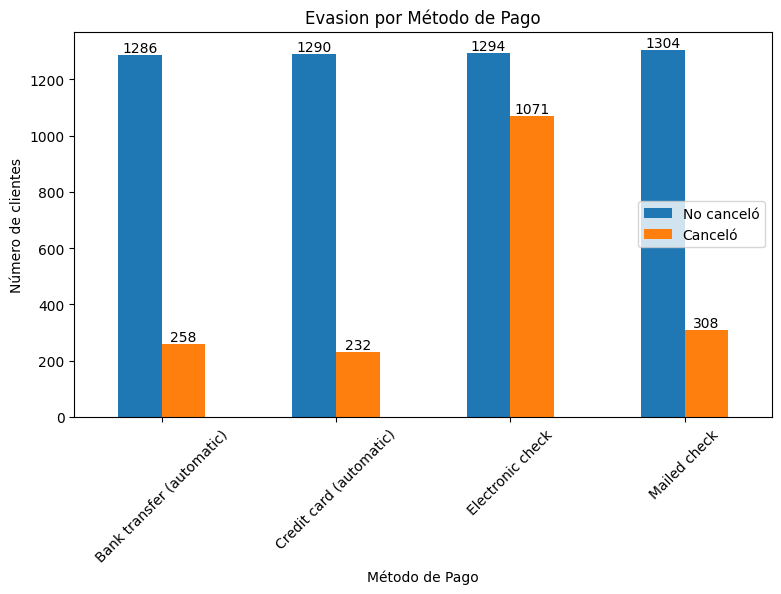

In [202]:
ax = churn_pago.plot(kind='bar', figsize=(9,5))

plt.title('Evasion por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(['No canceló', 'Canceló'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


####Evasion por facturacion Electronica

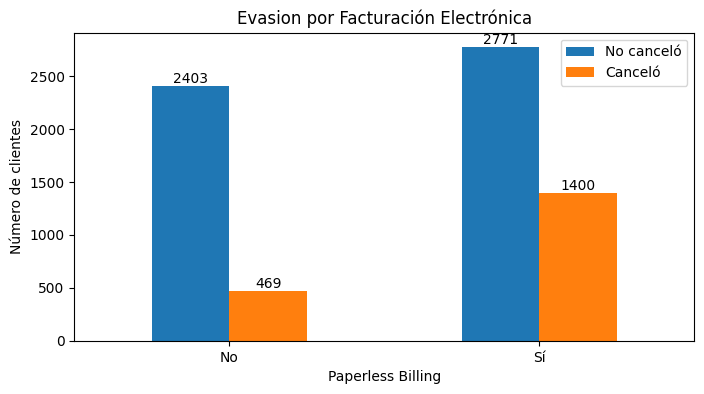

In [203]:
churn_paperless = (
    datos_limpios
    .groupby(['PaperlessBilling', 'Churn'])
    .size()
    .unstack()
)

ax = churn_paperless.plot(kind='bar', figsize=(8,4))

plt.title('Evasion por Facturación Electrónica')
plt.xlabel('Paperless Billing')
plt.ylabel('Número de clientes')
plt.xticks([0,1], ['No', 'Sí'], rotation=0)
plt.legend(['No canceló', 'Canceló'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


####Evasion por servicio de Internet

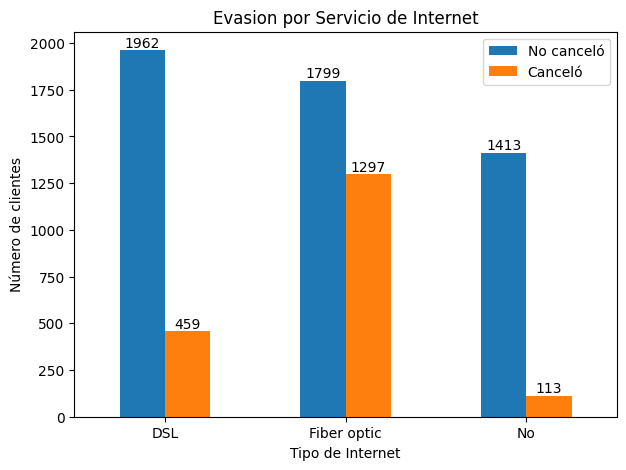

In [204]:
churn_internet = (
    datos_limpios
    .groupby(['InternetService', 'Churn'])
    .size()
    .unstack()
)

ax = churn_internet.plot(kind='bar', figsize=(7,5))

plt.title('Evasion por Servicio de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(['No canceló', 'Canceló'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


####Evasion por Antigüedad del cliente

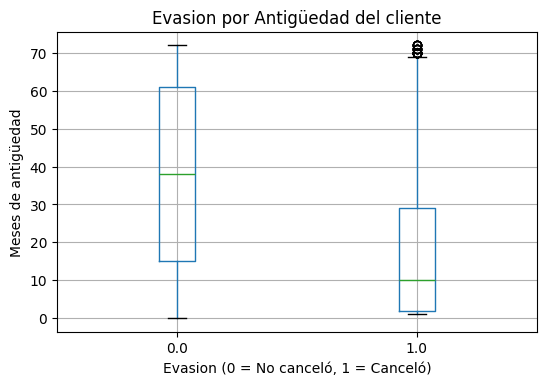

In [205]:
datos_limpios.boxplot(
    column='Antiguedad_Meses',
    by='Churn',
    figsize=(6,4)
)

plt.title('Evasion por Antigüedad del cliente')
plt.suptitle('')
plt.xlabel('Evasion (0 = No canceló, 1 = Canceló)')
plt.ylabel('Meses de antigüedad')
plt.show()


Boxplot – Evasion por cargo mensual

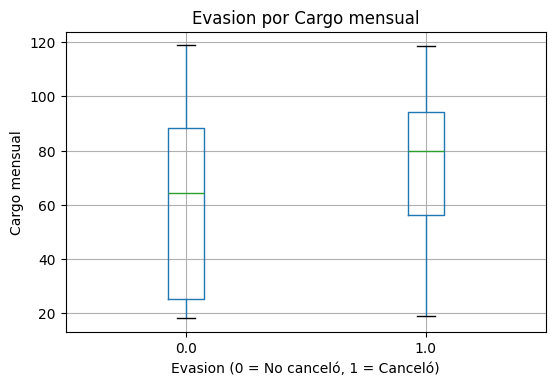

In [206]:
datos_limpios.boxplot(
    column='Cargo_Mensual',
    by='Churn',
    figsize=(6,4)
)

plt.title('Evasion por Cargo mensual')
plt.suptitle('')
plt.xlabel('Evasion (0 = No canceló, 1 = Canceló)')
plt.ylabel('Cargo mensual')
plt.show()


####Evasion por Facturacion Diaria

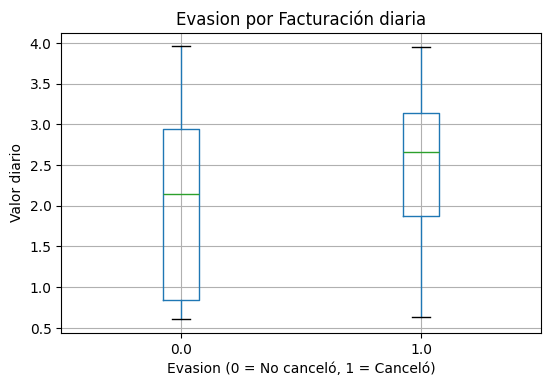

In [207]:
datos_limpios.boxplot(
    column='Cuentas_Diarias',
    by='Churn',
    figsize=(6,4)
)

plt.title('Evasion por Facturación diaria')
plt.suptitle('')
plt.xlabel('Evasion (0 = No canceló, 1 = Canceló)')
plt.ylabel('Valor diario')
plt.show()


#**Informe Final**

📊 Análisis de Evasión de Clientes (Churn) – TelecomX
1. Introducción

El presente proyecto tiene como objetivo analizar la evasión de clientes (Churn) en la empresa TelecomX, identificando patrones y factores asociados al abandono del servicio.

La evasión representa un desafío estratégico para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y en la fidelización de los clientes. A través del análisis exploratorio de datos, se busca comprender el comportamiento de los clientes y generar insights accionables que contribuyan a la toma de decisiones orientadas a la reducción del churn.

2. Limpieza y Tratamiento de Datos

Para garantizar la calidad del análisis, se realizaron los siguientes procesos:

Carga de datos directamente desde la API oficial del proyecto.

Conversión de los datos a un DataFrame de Pandas.

Normalización de columnas que contenían estructuras anidadas (diccionarios), separándolas en variables individuales.

Transformación de variables categóricas binarias (Sí / No) a valores numéricos (1 / 0).

Revisión y tratamiento de valores nulos, especialmente en la variable objetivo Churn.

Conversión de tipos de datos para asegurar consistencia numérica.

Creación de la variable Cuentas_Diarias, calculada a partir del cargo mensual.

Como resultado, se obtuvo un dataset limpio con 7.267 registros y 22 variables, listo para el análisis exploratorio.

3. Análisis Exploratorio de Datos (EDA)

3.1 Distribución de la Evasión (Churn)

El análisis mostró que:

Aproximadamente 26.5% de los clientes presentan evasión.

Cerca del 73.5% permanecen activos.

Este resultado indica que, aunque la mayoría de los clientes se mantiene, la tasa de churn es relevante y requiere atención estratégica.

3.2 Churn según Variables Categóricas
📌 Tipo de Contrato

Los clientes con contrato mensual concentran más del 42% de la evasión total.

En contraste, los contratos anuales y bianuales presentan tasas de churn considerablemente menores.

📍 Insight: Los contratos de corto plazo están fuertemente asociados a una mayor evasión.

📌 Método de Pago

Clientes con pago automático muestran una tasa de evasión cercana al 15%.

Métodos de pago manuales superan el 30% de churn.

📍 Insight: La automatización del pago reduce significativamente la probabilidad de cancelación.

📌 Servicios Adicionales

Clientes sin servicios como OnlineSecurity o TechSupport presentan tasas de evasión superiores al 35%.

Aquellos que cuentan con estos servicios reducen su churn a valores cercanos al 20%.

📍 Insight: Los servicios adicionales actúan como factores de retención.

3.3 Churn según Variables Numéricas
📌 Antigüedad

Los clientes que cancelan tienen una antigüedad media inferior a 18 meses.

Los clientes que permanecen superan en promedio los 37 meses.

📍 Insight: A menor antigüedad, mayor probabilidad de evasión.

📌 Cargo Mensual

Clientes con churn presentan cargos mensuales promedio cercanos a $75.

Clientes que permanecen tienen cargos promedio alrededor de $55.

📍 Insight: Cargos elevados sin beneficios adicionales aumentan el riesgo de abandono.

📌 Valores Atípicos

Los boxplots revelaron la presencia de outliers, correspondientes a clientes con comportamientos extremos. Estos valores no fueron eliminados, ya que representan clientes reales y aportan información relevante al análisis.

4. Conclusiones e Insights Principales

El 26.5% de los clientes presenta evasión.

El contrato mensual es el principal factor asociado al churn.

Clientes con menos de 2 años de antigüedad tienen mayor probabilidad de cancelar.

Los cargos mensuales altos incrementan el riesgo de evasión.

Servicios adicionales reducen la tasa de churn hasta en 15 puntos porcentuales.

La evasión es un fenómeno multifactorial, no atribuible a una sola variable.

5. Recomendaciones

Con base en los hallazgos, se proponen las siguientes estrategias:

Incentivar contratos de mayor duración mediante descuentos o beneficios.

Implementar campañas de retención enfocadas en clientes nuevos (primeros 12–18 meses).

Promover la adopción de servicios adicionales como valor agregado.

Fomentar el uso de métodos de pago automáticos.

Utilizar estos insights como base para desarrollar modelos predictivos de churn.

6. Consideraciones Finales

Este análisis permitió transformar datos en información estratégica, proporcionando una base sólida para la toma de decisiones orientadas a la reducción de la evasión y al fortalecimiento de la relación con los clientes.


####**Extra**
Como análisis adicional, se exploró la correlación entre distintas variables numéricas y la evasión de clientes. Se identificó una correlación negativa entre la antigüedad y el churn, indicando que los clientes más antiguos tienden a permanecer en la empresa. Asimismo, se observó que un mayor gasto diario y mensual está asociado con una mayor probabilidad de cancelación. Por otro lado, la contratación de múltiples servicios adicionales se relaciona con una menor tasa de evasión, sugiriendo que estos actúan como factores de retención.

#**Extra**

####**Correlación entre Variables**

In [208]:
variables_corr = [
    'Churn',
    'Cuentas_Diarias',
    'Antiguedad_Meses',
    'Cargo_Mensual',
    'Cargo_Total',
    'OnlineSecurity',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

corr_matrix = datos_limpios[variables_corr].corr()
corr_matrix


,Churn,Cuentas_Diarias,Antiguedad_Meses,Cargo_Mensual,Cargo_Total,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
Churn,1.000000,0.193356,-0.352229,0.193356,-0.198324,-0.171226,-0.164674,0.063228,0.061382
Cuentas_Diarias,0.193356,1.000000,0.247982,1.000000,0.652211,0.298307,0.338429,0.628874,0.628184
Antiguedad_Meses,-0.352229,0.247982,1.000000,0.247982,0.825407,0.327252,0.322139,0.280738,0.286841
Cargo_Mensual,0.193356,1.000000,0.247982,1.000000,0.652211,0.298307,0.338429,0.628874,0.628184
Cargo_Total,-0.198324,0.652211,0.825407,0.652211,1.000000,0.412764,0.431032,0.516185,0.521490
OnlineSecurity,-0.171226,0.298307,0.327252,0.298307,0.412764,1.000000,0.356113,0.177332,0.189881
TechSupport,-0.164674,0.338429,0.322139,0.338429,0.431032,0.356113,1.000000,0.278376,0.280058
StreamingTV,0.063228,0.628874,0.280738,0.628874,0.516185,0.177332,0.278376,1.000000,0.531336
StreamingMovies,0.061382,0.628184,0.286841,0.628184,0.521490,0.189881,0.280058,0.531336,1.000000


Matriz de correlación (visual)

Este gráfico permite ver relaciones positivas y negativas de forma clara.

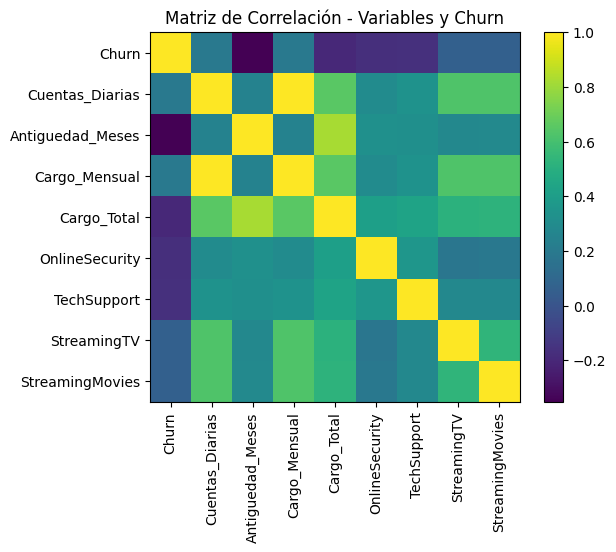

In [209]:
#Este gráfico permite ver relaciones positivas y negativas de forma clara.
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(variables_corr)), variables_corr, rotation=90)
plt.yticks(range(len(variables_corr)), variables_corr)
plt.title('Matriz de Correlación - Variables y Churn')
plt.show()


####Evasion por cuentas Diarias

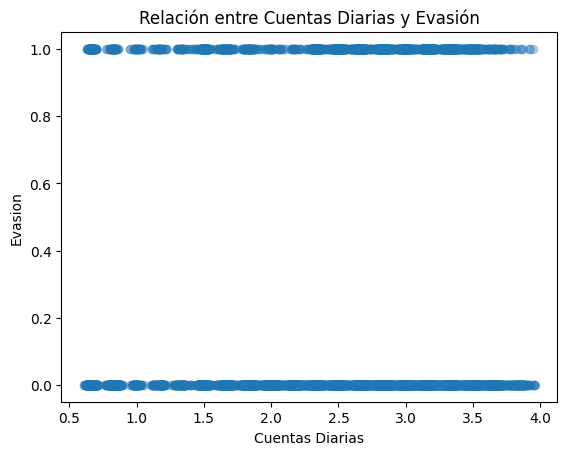

In [210]:
plt.figure()
plt.scatter(datos_limpios['Cuentas_Diarias'], datos_limpios['Churn'], alpha=0.3)
plt.xlabel('Cuentas Diarias')
plt.ylabel('Evasion')
plt.title('Relación entre Cuentas Diarias y Evasión')
plt.show()


####Evasion por Servicios contratados

In [211]:
datos_limpios['Total_Servicios'] = (
    datos_limpios['OnlineSecurity'] +
    datos_limpios['OnlineBackup'] +
    datos_limpios['DeviceProtection'] +
    datos_limpios['TechSupport'] +
    datos_limpios['StreamingTV'] +
    datos_limpios['StreamingMovies']
)

churn_servicios = datos_limpios.groupby('Total_Servicios')['Churn'].mean()
churn_servicios


,Churn
Total_Servicios,
0,0.214060
1,0.457557
2,0.358180
3,0.273703
4,0.223005
5,0.124343
6,0.052817


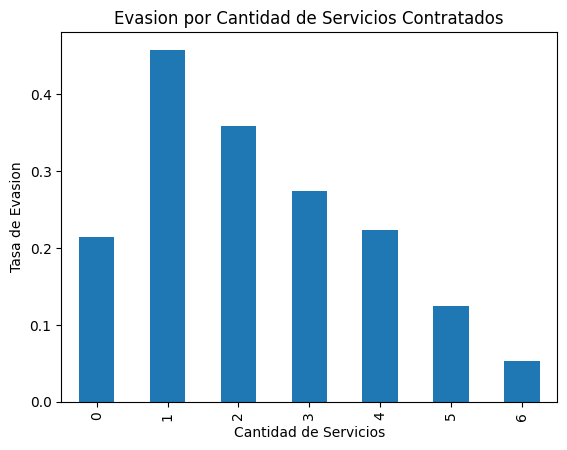

In [212]:
#A mayor número de servicios → menor tasa de evasión
plt.figure()
churn_servicios.plot(kind='bar')
plt.xlabel('Cantidad de Servicios')
plt.ylabel('Tasa de Evasion')
plt.title('Evasion por Cantidad de Servicios Contratados')
plt.show()
